<a href="https://colab.research.google.com/github/karlex7/ML_Covid_Detection/blob/main/ML_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 detection

Based on patients answers and the results of real covid-19 test we would like to establish which
combination of symptoms will tell us that someone has corona or not. Our hypothesis is that there is link
between symptoms data and the result of real covid-19 test and there is a way to calculate that value.


This is a medical trail and our goal is to include all patients that are sick which means
we want high recall. The worst thing that can happen to us is that we classify a positive person as
negative which is False Negative, and we want to avoid that.

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
sns.set(rc={"figure.figsize":(6, 8)}) #width=3, #height=4

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score


from sklearn.model_selection import RepeatedKFold, GridSearchCV


In [240]:
covid = pd.read_csv("/content/Covid Dataset.csv")
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [241]:
covid.shape #(5434, 21)

(5434, 21)

## Data cleaning

In [242]:
covid.isnull().sum().sum()

0

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [ ]:
covid.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
covid['Breathing Problem']=label_encoder.fit_transform(covid['Breathing Problem'])
covid['Fever']=label_encoder.fit_transform(covid['Fever'])
covid['Dry Cough']=label_encoder.fit_transform(covid['Dry Cough'])
covid['Sore throat']=label_encoder.fit_transform(covid['Sore throat'])
covid['Running Nose']=label_encoder.fit_transform(covid['Running Nose'])
covid['Asthma']=label_encoder.fit_transform(covid['Asthma'])
covid['Chronic Lung Disease']=label_encoder.fit_transform(covid['Chronic Lung Disease'])
covid['Headache']=label_encoder.fit_transform(covid['Headache'])
covid['Heart Disease']=label_encoder.fit_transform(covid['Heart Disease'])
covid['Diabetes']=label_encoder.fit_transform(covid['Diabetes'])
covid['Hyper Tension']=label_encoder.fit_transform(covid['Hyper Tension'])
covid['Abroad travel']=label_encoder.fit_transform(covid['Abroad travel'])
covid['Contact with COVID Patient']=label_encoder.fit_transform(covid['Contact with COVID Patient'])
covid['Attended Large Gathering']=label_encoder.fit_transform(covid['Attended Large Gathering'])
covid['Visited Public Exposed Places']=label_encoder.fit_transform(covid['Visited Public Exposed Places'])
covid['Family working in Public Exposed Places']=label_encoder.fit_transform(covid['Family working in Public Exposed Places'])
covid['Wearing Masks']=label_encoder.fit_transform(covid['Wearing Masks'])
covid['Sanitization from Market']=label_encoder.fit_transform(covid['Sanitization from Market'])
covid['COVID-19']=label_encoder.fit_transform(covid['COVID-19'])
covid['Dry Cough']=label_encoder.fit_transform(covid['Dry Cough'])
covid['Sore throat']=label_encoder.fit_transform(covid['Sore throat'])
covid['Gastrointestinal ']=label_encoder.fit_transform(covid['Gastrointestinal '])
covid['Fatigue ']=label_encoder.fit_transform(covid['Fatigue '])

In [ ]:
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


In [ ]:
covid.shape #(5434, 21)

(5434, 21)

## Exploratory analysis

In [ ]:
covid.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,0.490063,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,0.499947,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


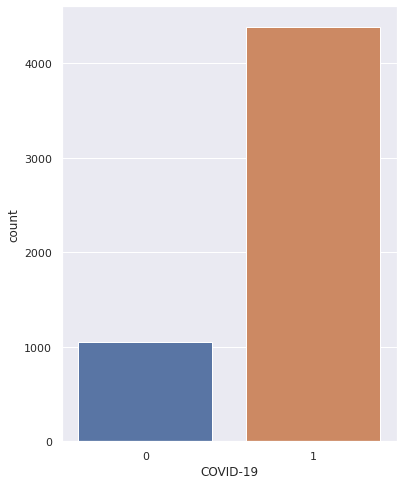

In [ ]:
sns.countplot(x='COVID-19', data = covid)

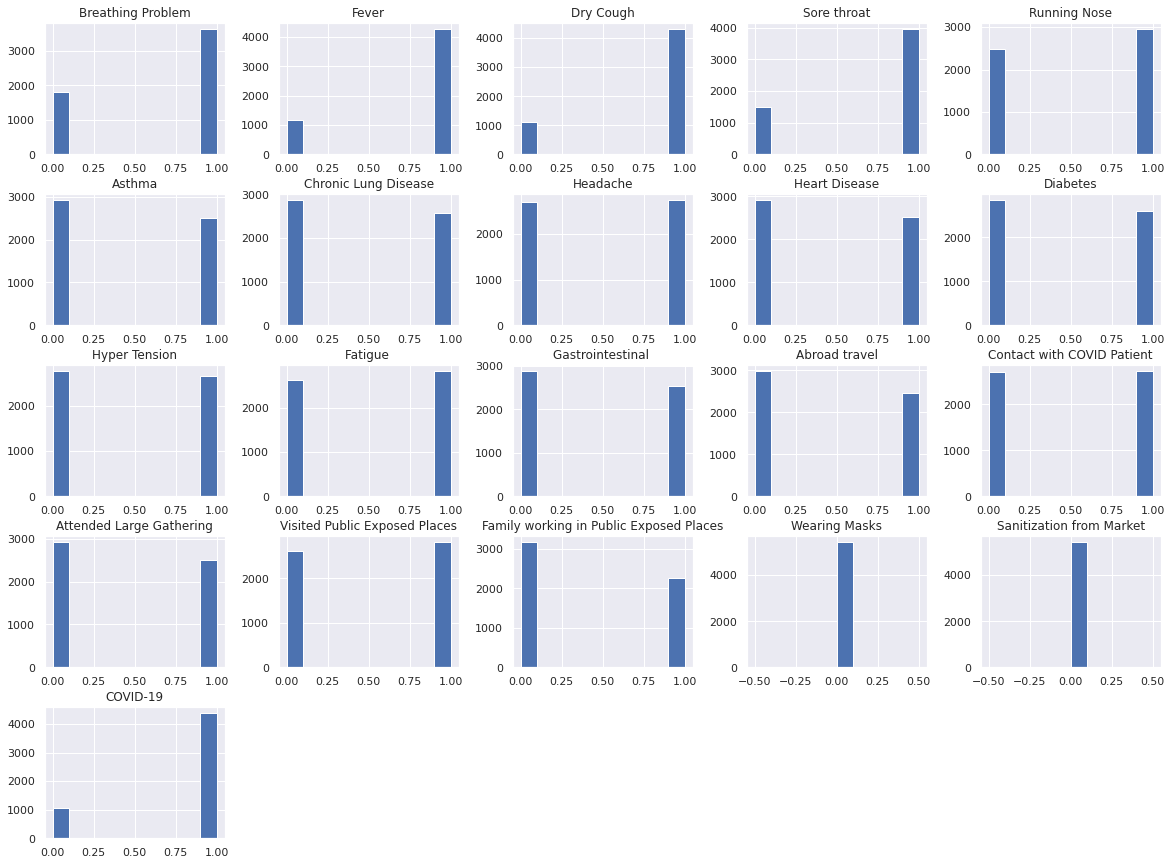

In [ ]:
covid.hist(figsize=(20,15))
plt.show()

## Feature selection

In [ ]:
correlations = covid.corrwith(covid['COVID-19'])
correlations

Breathing Problem                          0.443764
Fever                                      0.352891
Dry Cough                                  0.464292
Sore throat                                0.502848
Running Nose                              -0.005657
Asthma                                     0.089930
Chronic Lung Disease                      -0.056837
Headache                                  -0.027793
Heart Disease                              0.027072
Diabetes                                   0.040627
Hyper Tension                              0.102575
Fatigue                                   -0.044188
Gastrointestinal                          -0.003367
Abroad travel                              0.443875
Contact with COVID Patient                 0.357122
Attended Large Gathering                   0.390145
Visited Public Exposed Places              0.119755
Family working in Public Exposed Places    0.160208
Wearing Masks                                   NaN
Sanitization

In [ ]:
covid = covid.drop('Sanitization from Market', axis=1)
covid = covid.drop('Wearing Masks', axis=1)
covid = covid.drop('Gastrointestinal ', axis=1)
covid = covid.drop('Fatigue ', axis=1)
covid = covid.drop('Diabetes', axis=1)
covid = covid.drop('Heart Disease', axis=1)
covid = covid.drop('Headache', axis=1)
covid = covid.drop('Chronic Lung Disease', axis=1)
covid = covid.drop('Running Nose', axis=1)

In [ ]:
covid.shape #(5434, 12)

(5434, 12)

## Models

In [ ]:
train, test = train_test_split(covid, test_size = 0.30)

In [ ]:
x_test=test.drop('COVID-19',axis=1)
y_test=test['COVID-19']

In [ ]:
train, validate = train_test_split(train, test_size = 0.30)

In [ ]:
x_train=train.drop('COVID-19',axis=1)
y_train=train['COVID-19']

x_validate=validate.drop('COVID-19',axis=1)
y_validate=validate['COVID-19']

### Logistic Regresion

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=10)

scores = cross_val_score(log_reg, x_train, y_train, scoring='recall', cv=rkf, n_jobs=-1)
print('Score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Score: 0.987 (0.009)


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=10)

rf = RandomForestClassifier()

param_grid = [
    {
        "n_estimators": [300, 400, 500],
        "min_samples_leaf": [1, 2]
    }
]

rf_gridserach = GridSearchCV(rf, cv=rkf, n_jobs=8,
                              param_grid=param_grid,
                              return_train_score=True, 
                              scoring='recall')
rf_gridserach.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=10),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

In [ ]:
rf_gridserach.best_params_ #{'min_samples_leaf': 1, 'n_estimators': 400}

{'min_samples_leaf': 1, 'n_estimators': 400}

In [ ]:
rf_gridserach.best_score_

0.9774248824307961

In [ ]:
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=1)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = [
    {
        "n_neighbors": [10, 20, 30]
    }
]

knn_gridserach = GridSearchCV(knn, cv=rkf, n_jobs=8,
                              param_grid=param_grid,
                              return_train_score=True, 
                              scoring='recall')
knn_gridserach.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=10),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=8,
             param_grid=[{'n_neighbors': [10, 20, 30]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=0)

In [ ]:
knn_gridserach.best_params_

{'n_neighbors': 30}

In [ ]:
knn_gridserach.best_score_

0.987833631692896

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)

### SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC()

param_grid = [
    {
        "kernel": ['rbf','linear'],
        "gamma": [1e-3, 1e-4, 0.05, 0.1, 0.15],
        "C": [1, 10, 100, 1000]
    }
]
svc_gridserach = GridSearchCV(svc, cv=rkf, n_jobs=8,
                              param_grid=param_grid,
                              return_train_score=True, 
                              scoring='recall')
svc_gridserach.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=10),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 0.05, 0.1, 0.15],
                          'kernel': ['rbf', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=0)

In [243]:
svc_gridserach.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
svc_gridserach.best_score_

1.0

In [ ]:
svc = SVC(C=1, gamma=0.001, kernel='rbf')

### XGBoost

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

param_grid = [
    {
     "learning_rate"    : [ 0.01, 0.30],
     "max_depth"        : [ 3, 4, 10,],
     "gamma"            : [ 0.0, 0.1, 0.2],
     "colsample_bytree" : [ 0.3, 0.4, 0.5]
    }
]

xgb_gridserach = GridSearchCV(xgb_clf, cv=rkf, n_jobs=8,
                              param_grid=param_grid,
                              return_train_score=True, 
                              scoring='recall')
xgb_gridserach.fit(x_train, y_train)


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=10),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=8,
             param_grid=[{'colsample_bytree': [0.3, 0.4, 0.5],
                          'gamma': [0.0, 0.1, 0.

In [ ]:
xgb_gridserach.best_params_

{'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 3}

In [ ]:
xgb_gridserach.best_score_

1.0

In [ ]:
xg = xgb.XGBClassifier(colsample_bytree=0.3, gamma=0.0, learning_rate=0.01, max_depth=3)

### Voting Classifier

In [250]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=1)
knn = KNeighborsClassifier(n_neighbors=30)
svc = SVC(C=1, gamma=0.001, kernel='rbf')
xg = xgb.XGBClassifier(colsample_bytree=0.3, gamma=0.0, learning_rate=0.01, max_depth=3)

voting_clf = VotingClassifier(estimators=[('Logistic_regresion', log_reg),
                                          ('Random_forest', rf),
                                          ('Knn', knn),
                                          ('Svm',svc), 
                                          ('XGBoost', xg)],
                              voting = 'hard')
for clf, label in zip([log_reg, rf, knn, svc, xg], ['Logistic_regresion', 'Random_forest', 'Knn', 'Svm', 'XGBoost']):
  scores = cross_val_score(clf, x_train, y_train, scoring='recall', cv=3)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.99 (+/- 0.00) [Logistic_regresion]
Accuracy: 0.99 (+/- 0.00) [Random_forest]
Accuracy: 0.99 (+/- 0.00) [Knn]
Accuracy: 1.00 (+/- 0.00) [Svm]
Accuracy: 1.00 (+/- 0.00) [XGBoost]


In [252]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('Logistic_regresion',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Random_forest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alp...
                                            colsample_bynode=1,
                              

In [253]:
y_voting_pred = voting_clf.predict(x_test)

In [258]:
score_voting = recall_score(y_test, y_voting_pred)
print("Recall score for voting classifier: ", score_voting) #0.9984871406959153

Recall score for voting classifier:  0.9984871406959153
